In [2]:
# housekeeping
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

# Enable inline plotting
%matplotlib inline

In [3]:
# read  train data and do sanity check

train_df = pd.read_json('../data/train.json')
train_df.info()
display(train_df.head())
display(train_df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


,cuisine,id,ingredients
39769,irish,29109,"[light brown sugar, granulated sugar, butter, ..."
39770,italian,11462,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,irish,2238,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,chinese,41882,"[boneless chicken skinless thigh, minced garli..."
39773,mexican,2362,"[green chile, jalapeno chilies, onions, ground..."


In [5]:
# list unique cusines
print "There are " + str( len(train_df.cuisine.unique())) + " cuisines in the train dataset" 
print "They are:"
print train_df.cuisine.unique()

There are 20 cuisines in the train dataset
They are:
[u'greek' u'southern_us' u'filipino' u'indian' u'jamaican' u'spanish'
 u'italian' u'mexican' u'chinese' u'british' u'thai' u'vietnamese'
 u'cajun_creole' u'brazilian' u'french' u'japanese' u'irish' u'korean'
 u'moroccan' u'russian']


,id
cuisine,
brazilian,467
russian,489
jamaican,526
irish,667
filipino,755
british,804
moroccan,821
vietnamese,825
korean,830


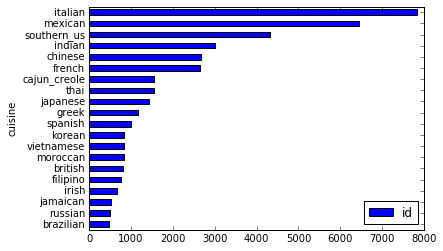

In [6]:
# How many times each unique cusine is occuring in the training data set
dfsubset = train_df.loc[:,('cuisine','id')]
dfsubset.groupby('cuisine').count().sort_values('id').plot.barh(stacked = True)
cuisines = dfsubset.groupby('cuisine')
cuisines.count().sort_values('id')

In [7]:
# Calculate num of ingrideints for every recipe and add it as a new column
train_df['NumbOfIngridients'] = train_df['ingredients'].apply(lambda x: len(x))
display(train_df.head())
display(train_df.tail())
test_df['NumbOfIngridients'] = test_df['ingredients'].apply(lambda x: len(x))
display(test_df.head())
display(test_df.tail())

,cuisine,id,ingredients,NumbOfIngridients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


,cuisine,id,ingredients,NumbOfIngridients
39769,irish,29109,"[light brown sugar, granulated sugar, butter, ...",12
39770,italian,11462,"[KRAFT Zesty Italian Dressing, purple onion, b...",7
39771,irish,2238,"[eggs, citrus fruit, raisins, sourdough starte...",12
39772,chinese,41882,"[boneless chicken skinless thigh, minced garli...",21
39773,mexican,2362,"[green chile, jalapeno chilies, onions, ground...",12


,id,ingredients,NumbOfIngridients
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",6
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",11
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",6
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",21
4,35687,"[ground black pepper, salt, sausage casings, l...",8


,id,ingredients,NumbOfIngridients
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo...",9
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc...",5
9941,22339,"[black pepper, salt, parmigiano reggiano chees...",8
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato...",15
9943,1443,"[cold water, olive oil, lime wedges, garlic cl...",18


In [10]:
# check simple statistic values for NumberOfIngridients
display(train_df.describe())
display(test_df.describe())

,id,NumbOfIngridients
count,39774.000000,39774.000000
mean,24849.536959,10.767713
std,14360.035505,4.428978
min,0.000000,1.000000
25%,12398.250000,8.000000
50%,24887.000000,10.000000
75%,37328.500000,13.000000
max,49717.000000,65.000000


,id,NumbOfIngridients
count,9944.000000,9944.000000
mean,24894.350362,10.799980
std,14322.958061,4.467154
min,5.000000,1.000000
25%,12541.000000,8.000000
50%,24731.500000,10.000000
75%,37113.250000,13.000000
max,49715.000000,50.000000


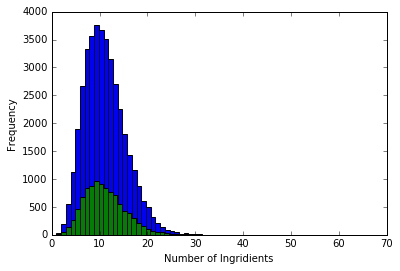

In [28]:
# check histograms for number of ingridients for train and test data
train_df['NumbOfIngridients'].plot.hist(bins = 65, label = 'Train data')
test_df['NumbOfIngridients'].plot.hist(bins = 50)
plt.xlabel('Number of Ingridients')

In [18]:
# check simple statistical values for NumberOfIngridients for each cuisine
dfsubset = train_df.loc[:,('cuisine','NumbOfIngridients')]
groupBy = dfsubset.groupby('cuisine')
groupBy['NumbOfIngridients'].agg([np.min, np.mean, np.max])

,amin,mean,amax
cuisine,,,
brazilian,2,9.520343,59
british,2,9.708955,30
cajun_creole,2,12.617076,31
chinese,2,11.982791,38
filipino,2,10.000000,38
french,1,9.817838,31
greek,1,10.182128,27
indian,1,12.705961,49
irish,2,9.299850,27


In [36]:
# Look for only recipies that have less than 1-2-3 ingridients
for i in range (1, 4):
    display(train_df[train_df.NumbOfIngridients == i].sort_values('ingredients'))
    display(test_df[test_df.NumbOfIngridients == i].sort_values('ingredients'))

,cuisine,id,ingredients,NumbOfIngridients
8990,indian,41124,[butter],1
22119,french,41135,[butter],1
21008,italian,39221,[cherry tomatoes],1
10506,mexican,32631,[corn tortillas],1
22387,indian,36874,[cumin seed],1
2088,vietnamese,7833,[dried rice noodles],1
13178,thai,29570,[grained],1
23512,french,35028,[haricots verts],1
18136,thai,39186,[jasmine rice],1
17804,southern_us,29849,[lemonade concentrate],1


,id,ingredients,NumbOfIngridients
7417,45798,[chiles],1
3248,34002,[glutinous rice],1
8081,45398,[parmesan cheese],1
3444,28414,[pimentos],1
544,36822,[plain low-fat yogurt],1
9407,32743,[shiitake],1
3621,10077,[sweetened condensed milk],1
4021,32883,[unsalted butter],1


,cuisine,id,ingredients,NumbOfIngridients
30387,greek,24255,"[2% reduced-fat milk, greek style plain yogurt]",2
5993,italian,4203,"[Chianti, navel oranges]",2
38966,filipino,28903,"[adobo, cooking oil]",2
38448,mexican,24895,"[adobo sauce, light mayonnaise]",2
19773,italian,11780,"[aged balsamic vinegar, parmigiano reggiano ch...",2
445,italian,8304,"[aged gouda, soppressata]",2
38166,irish,43056,"[ale, Guinness Beer]",2
7834,italian,42298,"[all-purpose flour, dough]",2
23704,cajun_creole,17840,"[all-purpose flour, vegetable oil]",2
25208,italian,39559,"[artichokes, lemon]",2


,id,ingredients,NumbOfIngridients
978,23211,"[Velveeta, Ro-Tel Diced Tomatoes & Green Chilies]",2
9859,6583,"[anchovy fillets, cheese]",2
8407,24708,"[annatto, olive oil]",2
5953,21404,"[açai, pudding]",2
1770,19191,"[baking potatoes, olive oil cooking spray]",2
6155,29434,"[beaujolais, crème de cassis]",2
1597,48564,"[biscuits, milk]",2
9513,40936,"[champagne, Guinness Beer]",2
6864,20135,"[champagne, crème de cassis]",2
1531,2174,"[chives, deveined shrimp]",2


,cuisine,id,ingredients,NumbOfIngridients
23752,italian,5368,"[1% low-fat milk, asiago, all-purpose flour]",3
39319,cajun_creole,41239,"[Alfredo sauce, shrimp, tilapia fillets]",3
31939,french,35856,"[French mustard, gruyere cheese, bread]",3
9439,korean,4718,"[Gochujang base, medjool date, toasted sesame ...",3
8782,irish,26467,"[Guinness Beer, ice cream, Irish whiskey]",3
30699,japanese,22227,"[Japanese soy sauce, dashi, mirin]",3
35637,indian,19927,"[Lipton Lemon Iced Tea Mix, mango, water]",3
6122,mexican,44355,"[Mexican beer, gin, fresh lemon juice]",3
12112,mexican,35657,"[Mexican cheese, refried beans, salsa]",3
9946,italian,6285,"[Ragu Sauce, spaghetti, water]",3


,id,ingredients,NumbOfIngridients
7778,14041,"[Italian turkey sausage, pasta sauce, olive oil]",3
9511,5908,"[all-purpose flour, boiling water, cold water]",3
4397,2721,"[all-purpose flour, pork sausages, milk]",3
2225,16761,"[almond paste, sugar, Spring! Water]",3
5503,44284,"[bacon, cream cheese, jalapeno chilies]",3
2103,8383,"[bacon slices, dark brown sugar, cracked black...",3
4893,19355,"[barbecue sauce, green cabbage, mayonaise]",3
4423,12206,"[black peppercorns, spaghetti, pecorino romano...",3
2638,46008,"[blanched almonds, firmly packed light brown s...",3
8951,42417,"[boneless skinless chicken breasts, italian sa...",3


In [9]:
# split ingridient list for train and test data



In [ ]:
# get unique ingridients for recipies that have 1-2-3 ingr per cuisine

# get number of unique ingridients per cuisine

# get ingridients that occurs only in 1 or 2 cuisines

# text analyzing: similar ingridient / different spelling

# get ingridients that occur in all cuisines

